In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#a few strings:
ww = 'Whole weight'
sw = 'Shucked weight'
vw = 'Viscera weight'
shell_w = 'Shell weight'
juicers = pd.read_csv('data.csv', header=None)
juicers.columns = ['Sex', 'Length', 'Diameter', 'Height', ww, sw, vw, shell_w, 'Rings']

male_number = juicers[juicers['Sex']=='M'].shape[0]
infant_number = juicers[juicers['Sex']=='I'].shape[0]
female_number = juicers[juicers['Sex']=='F'].shape[0]
juicers_number = juicers.shape[0]

juicers_sex_table = pd.DataFrame({
    'count': [male_number, infant_number, female_number],
    '%': [male_number * 100 / juicers_number, infant_number * 100 / juicers_number, female_number * 100 / juicers_number]
}, index=['Male', 'Infant', 'Female'])

juicers_sex_table = juicers_sex_table.round(2)

In [2]:
# Korzystając z pakietu Pandas, dla znajdującej się w zbiorze danych cechy jakościowej stworzyć tabelę rozkładu tej cechy
juicers_sex_table

,count,%
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


In [3]:
juicers_statistics_table = pd.DataFrame({
    'mean': juicers.mean(),
    'std': juicers.std(),
    'min': juicers.min(),
    '25%': juicers.quantile(q=0.25),
    '50%': juicers.median(),
    '75%': juicers.quantile(q=0.75),
    'max': juicers.max(),
}, index=['Length', 'Diameter', 'Height', ww, sw, vw, shell_w, 'Rings'])

juicers_statistics_table = juicers_statistics_table.round(2)

In [4]:
# Korzystając z pakietu Pandas, dla znajdujących się w zbiorze danych cech ilościowych stworzyć tabelę
# miar rozkładów tych cech
juicers_statistics_table

,mean,std,min,25%,50%,75%,max
Length,0.52,0.12,0.075,0.45,0.55,0.62,0.815
Diameter,0.41,0.10,0.055,0.35,0.42,0.48,0.65
Height,0.14,0.04,0.0,0.12,0.14,0.16,1.13
Whole weight,0.83,0.49,0.002,0.44,0.80,1.15,2.8255
Shucked weight,0.36,0.22,0.001,0.19,0.34,0.50,1.488
Viscera weight,0.18,0.11,0.0005,0.09,0.17,0.25,0.76
Shell weight,0.24,0.14,0.0015,0.13,0.23,0.33,1.005
Rings,9.93,3.22,1,8.00,9.00,11.00,29


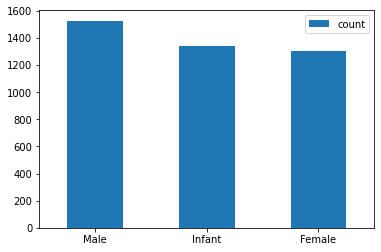

In [5]:
# Korzystając z wybranego pakietu spośród Matplotlib, Pandas lub Seaborn, dla znajdującej się w zbiorze danych cechy
# jakościowej stworzyć wykres słupkowy liczebności poszczególnych wariantów tej cechy.
juicers_bar_plot = juicers_sex_table.plot.bar(y='count', rot=0)

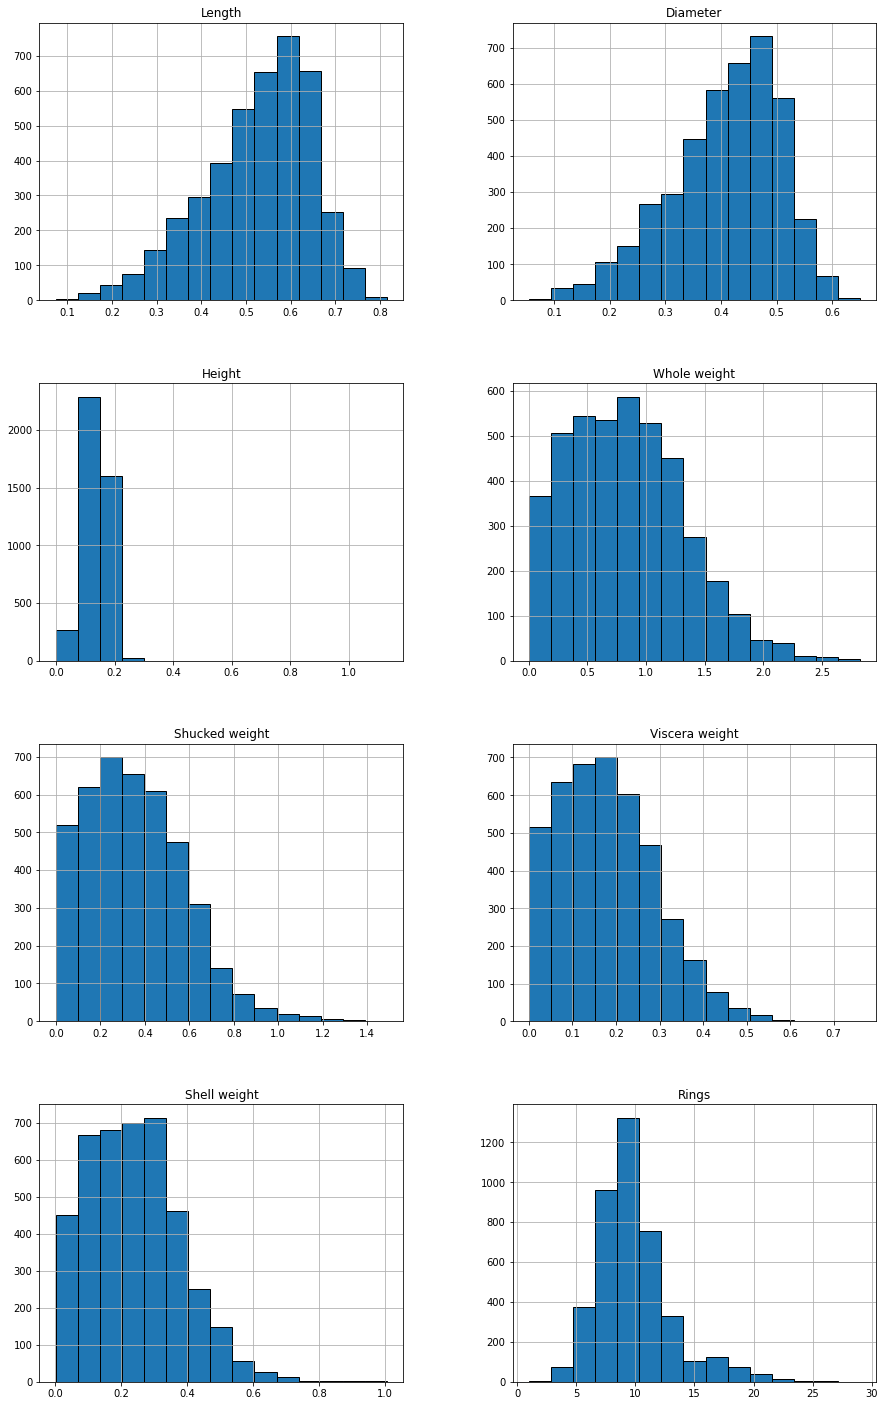

In [6]:
# Korzystając z wybranego pakietu spośród Matplotlib, Pandas lub Seaborn, dla każdej ze znajdujących się w zbiorze danych
# cech ilościowych stworzyć histogram tej cechy. Wszystkie histogramy mają zostać umieszczone na wspólnym obszarze
# wykresów w układzie zawierającym 4 wiersze i 2 kolumny.
histogram = juicers.hist(bins=15, figsize=(15, 25), layout=(4, 2), edgecolor="k")

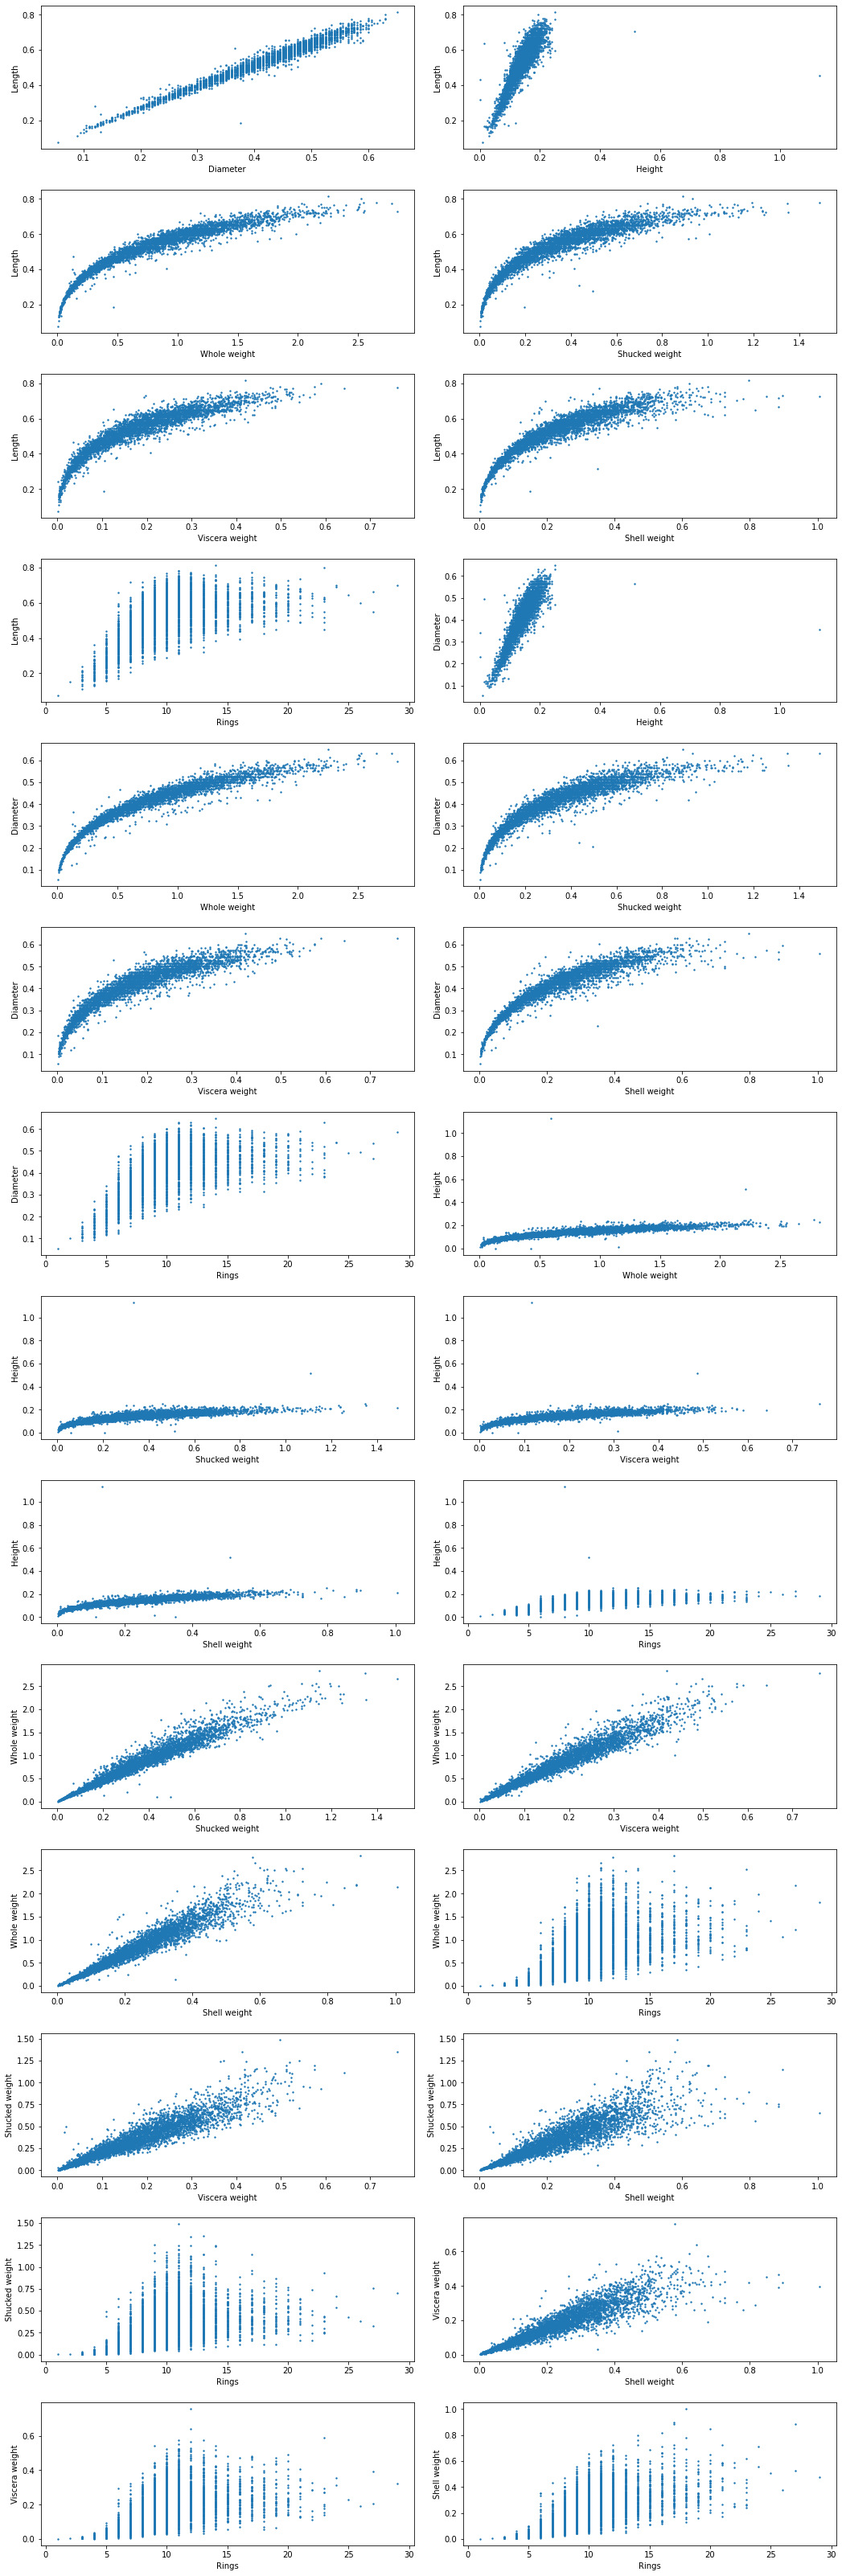

In [7]:
# Korzystając z wybranego pakietu spośród Matplotlib, Pandas lub Seaborn, dla każdej pary cech ilościowych znajdujących się
# w zbiorze danych stworzyć wykres punktowy. Wszystkie wykresy punktowe mają zostać umieszczone na wspólnym obszarze
# wykresów w układzie zawierającym 14 wierszy i 2 kolumny.
plt.rcParams.update({'figure.max_open_warning': 29})
import math
    
fig, axs = plt.subplots(nrows=14, ncols=2, figsize=(15, 45))
fig.tight_layout(pad=3.0)

index = 0
temp = juicers.columns.drop('Sex')
for i in juicers.columns.drop('Sex'):
    temp = temp.drop(i)
    for j in temp:
        axs[math.floor(index / 2), index % 2].scatter(juicers[j], juicers[i], s=2)
        axs[math.floor(index / 2), index % 2].set(xlabel=j, ylabel=i)
        index = index + 1

In [8]:
# Korzystając z pakietu Pandas, dla wszystkich cech ilościowych znajdujących się w zbiorze danych stworzyć tabelę
# zawierającą macierz korelacji liniowej tych cech.
correlation = juicers.corr().round(2)
correlation

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.00,0.99,0.83,0.93,0.90,0.90,0.90,0.56
Diameter,0.99,1.00,0.83,0.93,0.89,0.90,0.91,0.57
Height,0.83,0.83,1.00,0.82,0.77,0.80,0.82,0.56
Whole weight,0.93,0.93,0.82,1.00,0.97,0.97,0.96,0.54
Shucked weight,0.90,0.89,0.77,0.97,1.00,0.93,0.88,0.42
Viscera weight,0.90,0.90,0.80,0.97,0.93,1.00,0.91,0.50
Shell weight,0.90,0.91,0.82,0.96,0.88,0.91,1.00,0.63
Rings,0.56,0.57,0.56,0.54,0.42,0.50,0.63,1.00


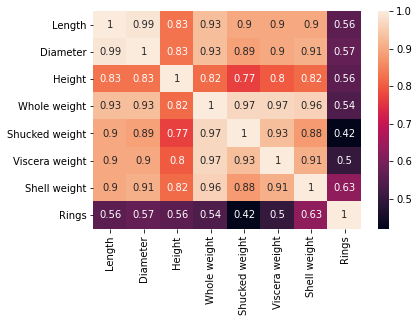

In [9]:
# Korzystając z pakietu Seaborn, dla wszystkich cech ilościowych znajdujących się w zbiorze danych stworzyć
# wykres reprezentujący macierz korelacji liniowej tych cech w postaci mapy cieplnej.
hmap = sns.heatmap(correlation, annot=True)

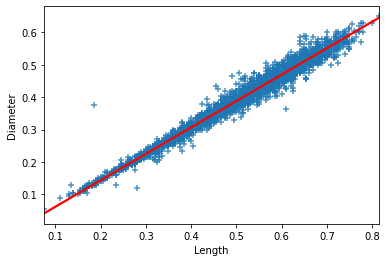

In [10]:
# Korzystając z pakietu Seaborn, dla dwóch cech ilościowych najmocniej skorelowanych liniowo stworzyć wykres
# regresji liniowej.
regplt = sns.regplot(x=juicers.Length, y=juicers.Diameter, marker='+', line_kws={'color': 'r'})

In [11]:
juicers_male = juicers[juicers['Sex']=='M']
juicers_infant = juicers[juicers['Sex']=='I']
juicers_female = juicers[juicers['Sex']=='F']

juicers_m = pd.DataFrame({
    'Sex': 'Male',
    'mean': juicers_male.mean(),
    'std': juicers_male.std(),
    'min': juicers_male.min(),
    '25%': juicers_male.quantile(q=0.25),
    '50%': juicers_male.median(),
    '75%': juicers_male.quantile(q=0.75),
    'max': juicers_male.max(),
}, index=['Length', 'Diameter', 'Height', ww, sw, vw, shell_w, 'Rings'])

juicers_i = pd.DataFrame({
    'Sex': 'Infant',
    'mean': juicers_infant.mean(),
    'std': juicers_infant.std(),
    'min': juicers_infant.min(),
    '25%': juicers_infant.quantile(q=0.25),
    '50%': juicers_infant.median(),
    '75%': juicers_infant.quantile(q=0.75),
    'max': juicers_infant.max(),
}, index=['Length', 'Diameter', 'Height', ww, sw, vw, shell_w, 'Rings'])

juicers_f = pd.DataFrame({
    'Sex': 'Female',
    'mean': juicers_female.mean(),
    'std': juicers_female.std(),
    'min': juicers_female.min(),
    '25%': juicers_female.quantile(q=0.25),
    '50%': juicers_female.median(),
    '75%': juicers_female.quantile(q=0.75),
    'max': juicers_female.max(),
}, index=['Length', 'Diameter', 'Height', ww, sw, vw, shell_w, 'Rings'])

juicers_m = juicers_m.round(2)
juicers_i = juicers_i.round(2)
juicers_f = juicers_f.round(2)


all = [juicers_m, juicers_i, juicers_f]

juicers_ultimate_table = pd.concat(all)
juicers_ultimate_table.index.name = "Feature"
juicers_ultimate_table = juicers_ultimate_table.reset_index()
juicers_ultimate_table = juicers_ultimate_table.set_index(['Feature', 'Sex'])
juicers_ultimate_table.sort_index(inplace=True)

In [12]:
# Korzystając z pakietu Pandas, dla znajdujących się w zbiorze danych cech ilościowych stworzyć tabelę miar
# rozkładów tych cech z podziałem na poszczególne warianty cechy jakościowej
juicers_ultimate_table

mean   std     min   25%    50%    75%     max
Feature        Sex                                                    
Diameter       Female   0.45  0.07   0.195  0.41   0.46   0.50    0.65
               Infant   0.33  0.09   0.055  0.27   0.34   0.39    0.55
               Male     0.44  0.08    0.11  0.40   0.46   0.50    0.63
Height         Female   0.16  0.04   0.015  0.14   0.16   0.18    1.13
               Infant   0.11  0.03     0.0  0.08   0.11   0.13    0.22
               Male     0.15  0.03   0.025  0.13   0.16   0.18   0.515
Length         Female   0.58  0.09   0.275  0.52   0.59   0.64   0.815
               Infant   0.43  0.11   0.075  0.36   0.44   0.51   0.725
               Male     0.56  0.10   0.155  0.50   0.58   0.63    0.78
Rings          Female  11.13  3.10       5  9.00  10.00  12.00      29
               Infant   7.89  2.51       1  6.00   8.00   9.00      21
               Male    10.71  3.03       3  9.00  10.00  12.00      27
Shell weight   Female   0.30  0.13   0.025  0.21   0.30   0.38   1.005
               Infant   0.13  0.08  0.0015  0.06   0.11   0.18   0.655
               Male     0.28  0.13   0.005  0.19   0.28   0.36   0.897
Shucked weight Female   0.45  0.20   0.031  0.30   0.44   0.57   1.488
               Infant   0.19  0.13   0.001  0.09   0.17   0.27  0.7735
               Male     0.43  0.22  0.0065  0.28   0.42   0.57   1.351
Viscera weight Female   0.23  0.10   0.021  0.16   0.22   0.30    0.59
               Infant   0.09  0.06  0.0005  0.04   0.08   0.13  0.4405
               Male     0.22  0.10   0.003  0.15   0.21   0.28    0.76
Whole weight   Female   1.05  0.43    0.08  0.73   1.04   1.32   2.657
               Infant   0.43  0.29   0.002  0.21   0.38   0.60  2.0495
               Male     0.99  0.47  0.0155  0.67   0.98   1.27  2.8255

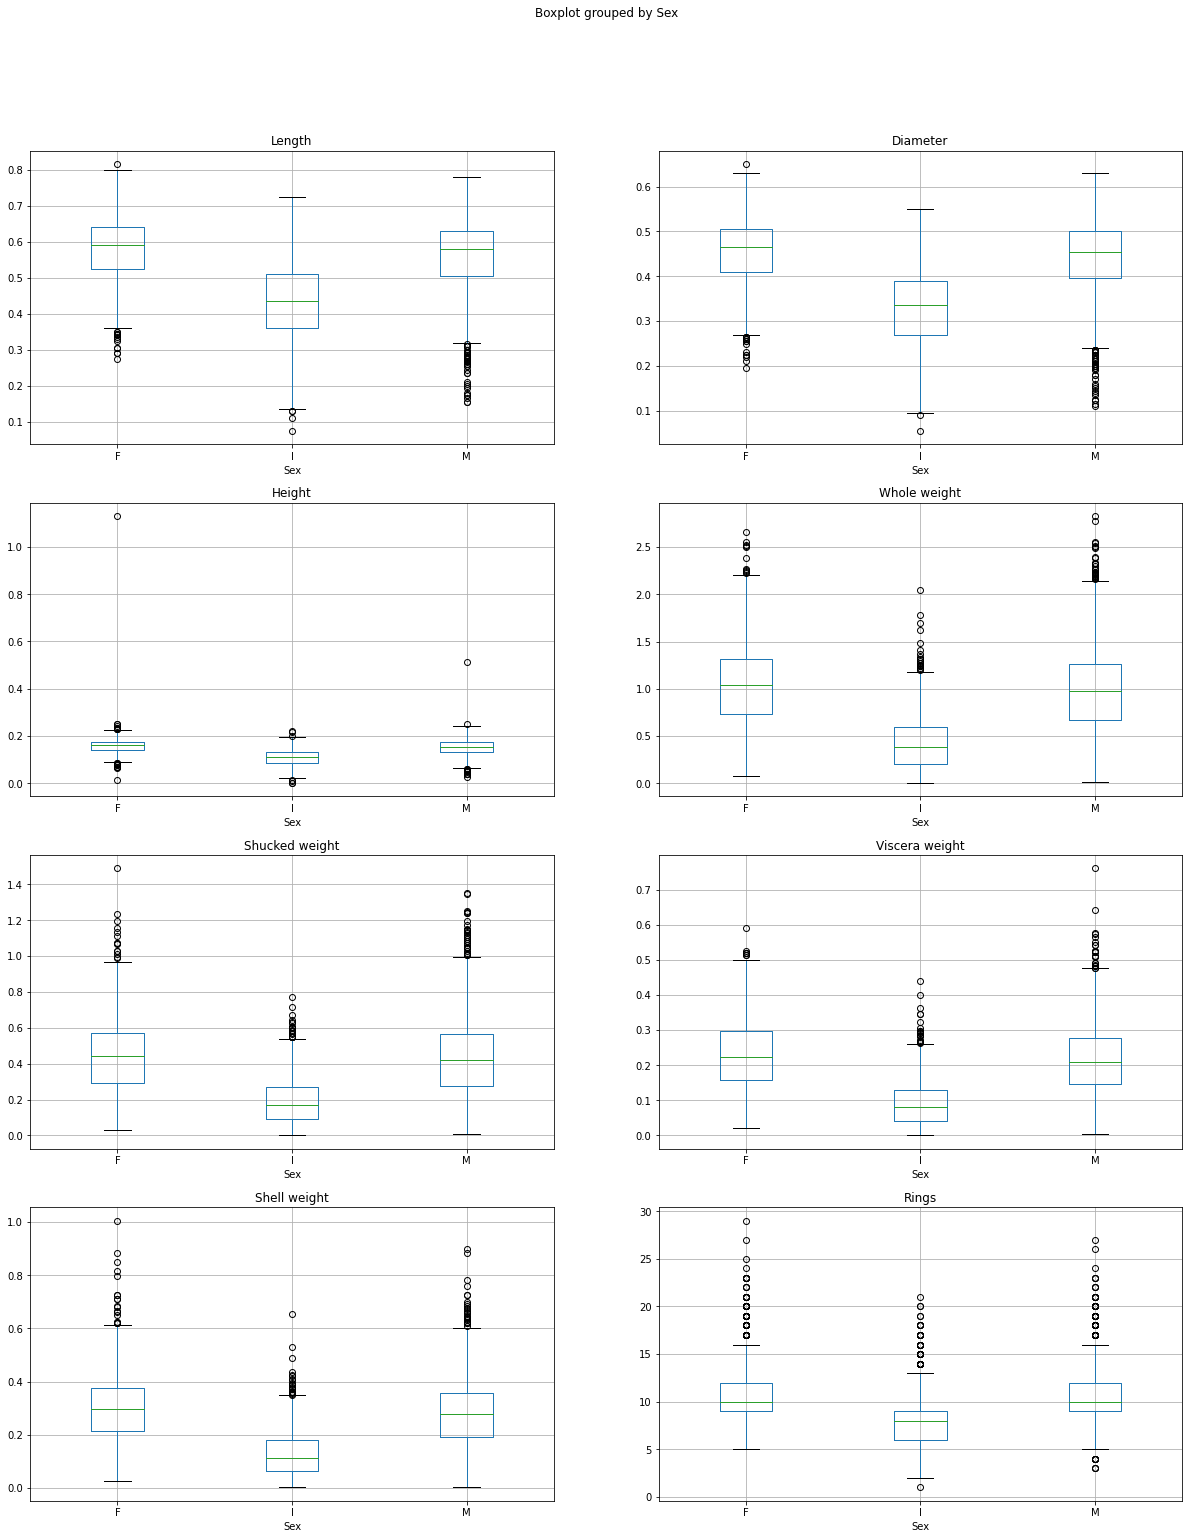

In [13]:
# Korzystając z wybranego pakietu spośród Matplotlib, Pandas lub Seaborn, dla każdej ze znajdujących się w zbiorze danych
# cech ilościowych stworzyć wykres pudełkowy tej cechy z rozróżnieniem poszczególnych wariantów cechy jakościowej. Wszystkie
# wykresy pudełkowe mają zostać umieszczone na wspólnym obszarze wykresów w układzie zawierającym 4 wiersze i 2kolumny.

fig, axs = plt.subplots(4, 2, figsize=(20, 25))
import numpy as np
for (x, y), (col1, col2) in zip(np.array(juicers.columns[1:]).reshape(4, 2), axs):
    juicers.boxplot(x, 'Sex', ax=col1)
    juicers.boxplot(y, 'Sex', ax=col2)